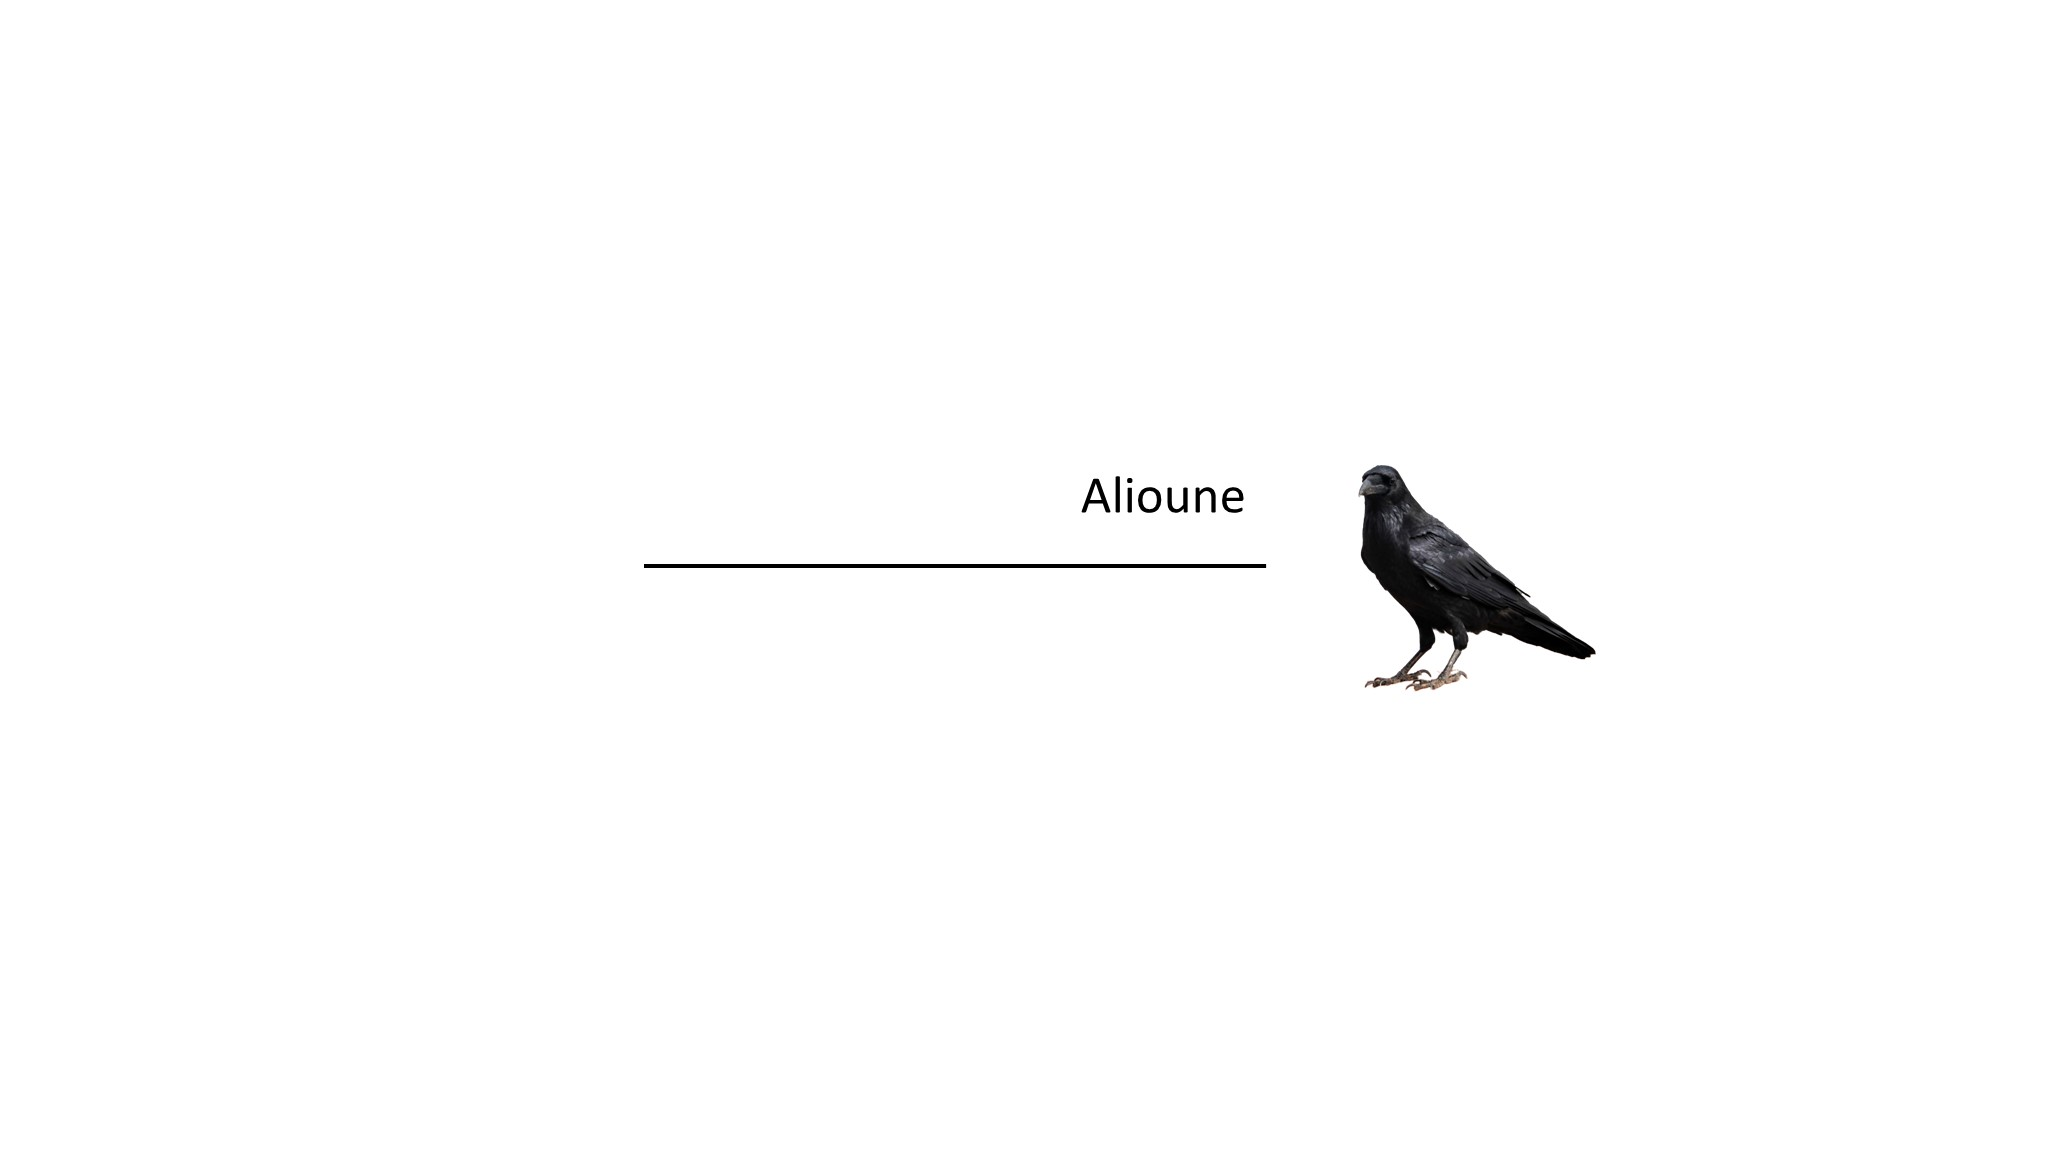

# Purpose of Notebook: EDA and Data Engineering (Notebook 1 of 4)
# <u>[Data Science Nigeria Challenge #1: Loan Default Prediction](https://zindi.africa/competitions/data-science-nigeria-challenge-1-loan-default-prediction/data)</u>

This is one of the Zindi challenges I have attempted to showcase my abilities in the data science profession.

In the folder containing this notebook, I have included three more notebooks as follows in order:
* `1_eda_preprocess.ipynb`
* `2_prep_for_sankey.ipynb`
* `3_sankey_birds_eyeview.ipynb`
* `4_class.ipynb`

The first notebook (`1_eda_preprocess.ipynb`) is where I did some EDA and data engineering. In the second (`2_prep_for_sankey.ipynb`) I prepared data to create the Sankey diagram. Following (`3_sankey_birds_eyeview.ipynb`) is where I created a Sankey diagram. Finally (`4_class.ipynb`) is the notebook where I processed the appropriate ML algorithm for the prediction.

<u>Prerequisites</u>:
* Install [Mito](https://docs.trymito.io/getting-started/installing-mito)

In [ ]:
import mitosheet
mitosheet.sheet(analysis_to_replay="id-zrqatafaya")

In [2]:
from mitosheet import *; register_analysis("id-zrqatafaya");
    
# Imported traindemographics.csv
import pandas as pd
traindemographics = pd.read_csv(r'traindemographics.csv')

# Imported trainperf.csv
import pandas as pd
trainperf = pd.read_csv(r'trainperf.csv')

# Merged trainperf and traindemographics into df3
temp_df = traindemographics.drop_duplicates(subset=['customerid']) # Remove duplicates so lookup merge only returns first match
df3 = trainperf.merge(temp_df, left_on=['customerid'], right_on=['customerid'], how='left', suffixes=['_trainperf', '_traindemographics'])

# Changed approveddate to dtype datetime
import pandas as pd
df3['approveddate'] = pd.to_datetime(df3['approveddate'], infer_datetime_format=True, errors='coerce')

# Changed creationdate to dtype datetime
import pandas as pd
df3['creationdate'] = pd.to_datetime(df3['creationdate'], infer_datetime_format=True, errors='coerce')

# Changed birthdate to dtype datetime
import pandas as pd
df3['birthdate'] = pd.to_datetime(df3['birthdate'], infer_datetime_format=True, errors='coerce')

# Set formula of referredby
df3['referredby'] = IF(df3['referredby']=='','No','Yes')

# Renamed columns referred
df3.rename(columns={'referredby': 'referred'}, inplace=True)

# Filtered birthdate
df3 = df3[df3['birthdate'].notnull()]

# Deleted columns bank_branch_clients
df3.drop(['bank_branch_clients'], axis=1, inplace=True)

# Filled NaN values in 1 columns in df3
df3.fillna({'employment_status_clients': 'Undisclosed'}, inplace=True)

# Deleted columns level_of_education_clients
df3.drop(['level_of_education_clients'], axis=1, inplace=True)

# Merged df3 and trainperf into df4
df4 = pd.DataFrame()

# Changed systemloanid to dtype str
df3['systemloanid'] = df3['systemloanid'].astype('str')

# Deleted columns systemloanid
df3.drop(['systemloanid'], axis=1, inplace=True)

# Renamed df3 to demo_perf_combined
demo_perf_combined = df3


C:\Users\Ali\anaconda3\envs\envDtale\lib\site-packages\mitosheet\sheet_functions\control_functions.py:138: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  data=[true_series.loc[i] if c else false_series.loc[i] for i, c in condition.iteritems()],


In [3]:
mitosheet.sheet(analysis_to_replay="id-iwrtsitrsz")

MitoWidget(analysis_data_json='{"analysisName": "id-wydfomzdcc", "analysisToReplay": {"analysisName": "id-iwrt…

In [4]:
from mitosheet import *; register_analysis("id-iwrtsitrsz");
    
# Imported trainprevloans.csv
import pandas as pd
trainprevloans = pd.read_csv(r'trainprevloans.csv')

# Imported demo_perf_combined.csv
import pandas as pd
demo_perf_combined = pd.read_csv(r'demo_perf_combined.csv')

# Merged demo_perf_combined and trainprevloans into df3
temp_df = trainprevloans.drop_duplicates(subset=['customerid']) # Remove duplicates so lookup merge only returns first match
df3 = demo_perf_combined.merge(temp_df, left_on=['customerid'], right_on=['customerid'], how='left', suffixes=['_demo_perf_combined', '_trainprevloans'])

# Filtered systemloanid
df3 = df3[df3['systemloanid'].notnull()]

# Filtered loannumber_trainprevloans
df3 = df3[df3['loannumber_trainprevloans'] != 20]

# Changed approveddate_trainprevloans to dtype datetime
import pandas as pd
df3['approveddate_trainprevloans'] = pd.to_datetime(df3['approveddate_trainprevloans'], infer_datetime_format=True, errors='coerce')

# Changed creationdate_trainprevloans to dtype datetime
import pandas as pd
df3['creationdate_trainprevloans'] = pd.to_datetime(df3['creationdate_trainprevloans'], infer_datetime_format=True, errors='coerce')

# Changed closeddate to dtype datetime
import pandas as pd
df3['closeddate'] = pd.to_datetime(df3['closeddate'], infer_datetime_format=True, errors='coerce')

# Deleted columns referredby
df3.drop(['referredby'], axis=1, inplace=True)

# Changed firstduedate to dtype datetime
import pandas as pd
df3['firstduedate'] = pd.to_datetime(df3['firstduedate'], infer_datetime_format=True, errors='coerce')

# Changed firstrepaiddate to dtype datetime
import pandas as pd
df3['firstrepaiddate'] = pd.to_datetime(df3['firstrepaiddate'], infer_datetime_format=True, errors='coerce')

# Changed creationdate_demo_perf_combined to dtype datetime
import pandas as pd
df3['creationdate_demo_perf_combined'] = pd.to_datetime(df3['creationdate_demo_perf_combined'], infer_datetime_format=True, errors='coerce')

# Changed approveddate_demo_perf_combined to dtype datetime
import pandas as pd
df3['approveddate_demo_perf_combined'] = pd.to_datetime(df3['approveddate_demo_perf_combined'], infer_datetime_format=True, errors='coerce')

# Added column new-column-1rk5
df3.insert(18, 'new-column-1rk5', 0)

# Renamed columns create_approved_length
df3.rename(columns={'new-column-1rk5': 'create_approved_length'}, inplace=True)

# Reordered column create_approved_length
df3_columns = [col for col in df3.columns if col != 'create_approved_length']
df3_columns.insert(12, 'create_approved_length')
df3 = df3[df3_columns]

# Reordered column create_approved_length
df3_columns = [col for col in df3.columns if col != 'create_approved_length']
df3_columns.insert(8, 'create_approved_length')
df3 = df3[df3_columns]

# Reordered column create_approved_length
df3_columns = [col for col in df3.columns if col != 'create_approved_length']
df3_columns.insert(4, 'create_approved_length')
df3 = df3[df3_columns]

# Set formula of create_approved_length
df3['create_approved_length'] = DATEVALUE(df3['approveddate_demo_perf_combined'])-DATEVALUE(df3['creationdate_demo_perf_combined'])

# Deleted columns approveddate_demo_perf_combined, creationdate_demo_perf_combined, create_approved_length
df3.drop(['approveddate_demo_perf_combined', 'creationdate_demo_perf_combined', 'create_approved_length'], axis=1, inplace=True)

# Changed birthdate to dtype datetime
import pandas as pd
df3['birthdate'] = pd.to_datetime(df3['birthdate'], infer_datetime_format=True, errors='coerce')

# Added column new-column-49ux
df3.insert(8, 'new-column-49ux', 0)

# Renamed columns age
df3.rename(columns={'new-column-49ux': 'age'}, inplace=True)

# Set formula of age
df3['age'] = YEAR('2017-12-30')

# Changed age to dtype int
df3['age'] = df3['age'].fillna(0).astype('int')

# Set formula of age
df3['age'] = 2017-YEAR(df3['birthdate'])

# Renamed columns age_as_at_2017
df3.rename(columns={'age': 'age_as_at_2017'}, inplace=True)

# Deleted columns birthdate
df3.drop(['birthdate'], axis=1, inplace=True)

# Deleted columns creationdate_trainprevloans
df3.drop(['creationdate_trainprevloans'], axis=1, inplace=True)

# Reordered column approveddate_trainprevloans
df3_columns = [col for col in df3.columns if col != 'approveddate_trainprevloans']
df3_columns.insert(18, 'approveddate_trainprevloans')
df3 = df3[df3_columns]

# Added column new-column-2r15
df3.insert(20, 'new-column-2r15', 0)

# Renamed columns closeddate_days
df3.rename(columns={'new-column-2r15': 'closeddate_days'}, inplace=True)

# Set formula of closeddate_days
df3['closeddate_days'] = STRIPTIMETODAYS(df3['closeddate'])-STRIPTIMETODAYS(df3['approveddate_trainprevloans'])

# Renamed columns closeddate_length
df3.rename(columns={'closeddate_days': 'closeddate_length'}, inplace=True)

# Added column new-column-563s
df3.insert(21, 'new-column-563s', 0)

# Renamed columns closeddate_days
df3.rename(columns={'new-column-563s': 'closeddate_days'}, inplace=True)

# Changed closeddate_length to dtype str
df3['closeddate_length'] = df3['closeddate_length'].astype('str')

# Split closeddate_length on " "
df3[['closeddate_length-split-0-4oqd', 'closeddate_length-split-1-4oqd']] = df3['closeddate_length'].str.split(' ', -1, expand=True)
df3 = df3[df3.columns[:23].tolist() + ['closeddate_length-split-0-4oqd', 'closeddate_length-split-1-4oqd'] + df3.columns[23:-2].tolist()]

# Deleted columns closeddate_length-split-1-4oqd, closeddate_days
df3.drop(['closeddate_length-split-1-4oqd', 'closeddate_days'], axis=1, inplace=True)

# Renamed columns closeddate_days
df3.rename(columns={'closeddate_length-split-0-4oqd': 'closeddate_days'}, inplace=True)

# Changed closeddate_days to dtype int
df3['closeddate_days'] = to_int_series(df3['closeddate_days'])

# Added column new-column-dtmj
df3.insert(23, 'new-column-dtmj', 0)

# Renamed columns firstduedate_len
df3.rename(columns={'new-column-dtmj': 'firstduedate_len'}, inplace=True)

# Set formula of firstduedate_len
df3['firstduedate_len'] = STRIPTIMETODAYS(df3['firstduedate'])-STRIPTIMETODAYS(df3['approveddate_trainprevloans'])

# Changed firstduedate_len to dtype str
df3['firstduedate_len'] = df3['firstduedate_len'].astype('str')

# Split firstduedate_len on " "
df3[['firstduedate_len-split-0-bjz3', 'firstduedate_len-split-1-bjz3']] = df3['firstduedate_len'].str.split(' ', -1, expand=True)
df3 = df3[df3.columns[:25].tolist() + ['firstduedate_len-split-0-bjz3', 'firstduedate_len-split-1-bjz3'] + df3.columns[25:-2].tolist()]

# Deleted columns firstduedate_len-split-1-bjz3
df3.drop(['firstduedate_len-split-1-bjz3'], axis=1, inplace=True)

# Renamed columns firstduedate_days
df3.rename(columns={'firstduedate_len-split-0-bjz3': 'firstduedate_days'}, inplace=True)

# Changed firstduedate_days to dtype int
df3['firstduedate_days'] = to_int_series(df3['firstduedate_days'])

# Added column new-column-nh5l
df3.insert(26, 'new-column-nh5l', 0)

# Renamed columns firstrepaiddate_len
df3.rename(columns={'new-column-nh5l': 'firstrepaiddate_len'}, inplace=True)

# Set formula of firstrepaiddate_len
df3['firstrepaiddate_len'] = STRIPTIMETODAYS(df3['firstrepaiddate'])-STRIPTIMETODAYS(df3['approveddate_trainprevloans'])

# Changed firstrepaiddate_len to dtype str
df3['firstrepaiddate_len'] = df3['firstrepaiddate_len'].astype('str')

# Split firstrepaiddate_len on " "
df3[['firstrepaiddate_len-split-0-pfxj', 'firstrepaiddate_len-split-1-pfxj']] = df3['firstrepaiddate_len'].str.split(' ', -1, expand=True)
df3 = df3[df3.columns[:27].tolist() + ['firstrepaiddate_len-split-0-pfxj', 'firstrepaiddate_len-split-1-pfxj'] + df3.columns[27:-2].tolist()]

# Renamed columns firstrepaiddate_days
df3.rename(columns={'firstrepaiddate_len-split-0-pfxj': 'firstrepaiddate_days'}, inplace=True)

# Deleted columns firstrepaiddate_len-split-1-pfxj
df3.drop(['firstrepaiddate_len-split-1-pfxj'], axis=1, inplace=True)

# Changed firstrepaiddate_days to dtype int
df3['firstrepaiddate_days'] = to_int_series(df3['firstrepaiddate_days'])

# Deleted columns firstrepaiddate, firstrepaiddate_len
df3.drop(['firstrepaiddate', 'firstrepaiddate_len'], axis=1, inplace=True)

# Deleted columns firstduedate, firstduedate_len
df3.drop(['firstduedate', 'firstduedate_len'], axis=1, inplace=True)

# Deleted columns closeddate, closeddate_length
df3.drop(['closeddate', 'closeddate_length'], axis=1, inplace=True)

# Deleted columns approveddate_trainprevloans
df3.drop(['approveddate_trainprevloans'], axis=1, inplace=True)

# Deleted columns customerid
df3.drop(['customerid'], axis=1, inplace=True)

# Filtered closeddate_days
df3 = df3[~df3['closeddate_days'].isin([381, 67])]

# Added column new-column-nuxa
df3.insert(18, 'new-column-nuxa', 0)

# Renamed columns closeddate
df3.rename(columns={'new-column-nuxa': 'closeddate'}, inplace=True)

# Set formula of closeddate
df3['closeddate'] = IF(AND(df3['closeddate']>=0,df3['closeddate']<=20),1,0)+IF(AND(df3['closeddate']>=21,df3['closeddate']<=40),2,0)+IF(df3['closeddate']>40,3,0)

# Deleted columns closeddate
df3.drop(['closeddate'], axis=1, inplace=True)

# Renamed df3 to clean
clean = df3

# Deleted columns loannumber_demo_perf_combined
clean.drop(['loannumber_demo_perf_combined'], axis=1, inplace=True)

# Renamed columns loanamount
clean.rename(columns={'loanamount_demo_perf_combined': 'loanamount'}, inplace=True)

# Renamed columns totaldue
clean.rename(columns={'totaldue_demo_perf_combined': 'totaldue'}, inplace=True)

# Renamed columns termdays
clean.rename(columns={'termdays_demo_perf_combined': 'termdays'}, inplace=True)

# Changed termdays to dtype str
clean['termdays'] = clean['termdays'].astype('str')

# Changed systemloanid to dtype str
clean['systemloanid'] = clean['systemloanid'].astype('str')

# Changed termdays_trainprevloans to dtype int
clean['termdays_trainprevloans'] = clean['termdays_trainprevloans'].fillna(0).astype('int')

# Duplicated clean
clean_copy = clean.copy(deep=True)

# Renamed clean_copy to clean_no_spatial
clean_no_spatial = clean_copy

# Deleted columns systemloanid, loannumber_trainprevloans
clean_no_spatial.drop(['systemloanid', 'loannumber_trainprevloans'], axis=1, inplace=True)

# Deleted columns longitude_gps
clean_no_spatial.drop(['longitude_gps'], axis=1, inplace=True)

# Deleted columns latitude_gps
clean_no_spatial.drop(['latitude_gps'], axis=1, inplace=True)


C:\Users\Ali\AppData\Local\Temp\ipykernel_3616\713144720.py:134: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df3[['closeddate_length-split-0-4oqd', 'closeddate_length-split-1-4oqd']] = df3['closeddate_length'].str.split(' ', -1, expand=True)
C:\Users\Ali\AppData\Local\Temp\ipykernel_3616\713144720.py:159: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df3[['firstduedate_len-split-0-bjz3', 'firstduedate_len-split-1-bjz3']] = df3['firstduedate_len'].str.split(' ', -1, expand=True)
C:\Users\Ali\AppData\Local\Temp\ipykernel_3616\713144720.py:184: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df3[['firstrepaiddate_len-split-0-pfxj', 'firstrepaiddate_len-split-1-pfxj']] = df3['firstrepaiddate_len'].str.split(' ', -1, expand=T